# 随机梯度下降

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 读入训练数据
train = np.loadtxt('click.csv', delimiter=',', dtype='int', skiprows=1)
train_x = train[:,0]
train_y = train[:,1]

In [4]:
# 标准化
mu = train_x.mean()
sigma = train_x.std()
def standardize(x):
    return (x - mu) / sigma

In [5]:
train_z = standardize(train_x)

In [6]:
# 用随机数对参数初始化
theta = np.random.rand(3)

In [7]:
# 均方误差的历史记录
errors = []

In [8]:
# 创建训练数据的矩阵
def to_matrix(x):
    return np.vstack([np.ones(x.size), x, x ** 2]).T

In [9]:
X = to_matrix(train_z)

In [10]:
# 预测函数
def f(x):
    return np.dot(x, theta)

In [11]:
# 均方误差
def MSE(x, y):
    return (1 / x.shape[0]) * np.sum((y - f(x)) ** 2)

In [12]:
# 学习率
ETA = 1e-3

In [13]:
# 误差的差值
diff = 1

In [14]:
# 更新次数
count = 0

In [15]:
# 重复学习
errors.append(MSE(X, train_y))
while diff > 1e-2:
    # 为了调整训练数据的顺序，准备随机的序列
    p = np.random.permutation(X.shape[0])
    # 随机取出训练数据，使用梯度下降法更新参数
    for x, y in zip(X[p,:], train_y[p]):
        theta = theta - ETA * (f(x) - y) * x
    # 计算与上一次误差的差值
    errors.append(MSE(X, train_y))
    diff = errors[-2] - errors[-1]

In [16]:
# 输出日志
count += 1
log = '第 {} 次 : theta = {}, 差值 = {:.4f}'
print(log.format(count, theta, diff))

第 1 次 : theta = [398.20803132  88.51141289  21.96353427], 差值 = 0.0098


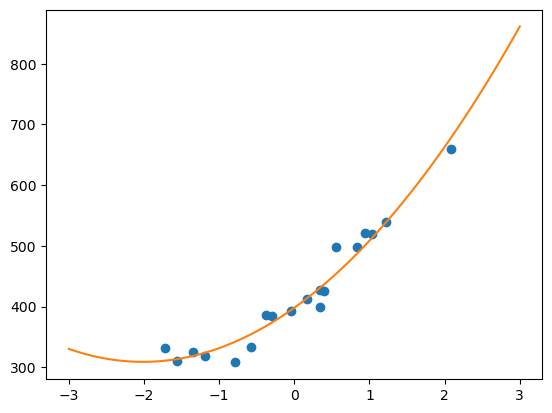

In [17]:
# 绘图确认
x = np.linspace(-3, 3, 100)
plt.plot(train_z, train_y, 'o')
plt.plot(x, f(to_matrix(x)))
plt.show()